In [1]:
import pandas as pandas
import matplotlib.pyplot as pyplot
import seaborn as seaborn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#Configuración para hacer que los números se lean mejor cuando se muestran
pandas.options.display.float_format = '{:20.2f}'.format

#Mostrar todas las columnas en la sálida
pandas.set_option('display.max_columns', 999)

# **Exploration Data Analysis**

In [2]:
df = pandas.read_excel("./data/online_retail_II.xlsx", sheet_name=0) #el sheet_name=0 es para específicar que solo queremos leer la primer sheet
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [3]:
df.info() #Este lo uso para información más a profundidad sobre el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe() #para ver las principales medidas estadisticas sobre el dataset

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [5]:
df.describe(include='O') #es para describir de forma específica los datos de objeto

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
df[df["Customer ID"].isna()].head(10) #aquí trato de ver la info de esas compras que no tienen un Customer ID

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [7]:
df[df["Quantity"] < 0].head(10) #aquí trato de ver la info sobre esas cantidades que están en negativo

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [8]:
#Corroborar los Invoice con C al principio y los que no la tienen
df["Invoice"] = df["Invoice"].astype("str") #se cambia a string para poder usar regexs sobre ello
df[df["Invoice"].str.match("^\\d{6}$") == False] #hago una expresión regex; una sintaxis para el emparejamiento de patrones de datos de texto.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [9]:
#Lo siguiente es para ver si hay otra letra que se este poniendo en los datos de Invoice
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [10]:
#Ver los datos que tienen la letra A en Invoice
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [11]:
#Se usan regexs para verificar la columna StockCode y ver si contiene letras también
# y que sean más de 5 dígitos como dicen las especificaciones del dataset y hay otros tipos de datos también en esa columna
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [12]:
#Checar todos los tipos de datos anteriores para ir viendo que significan y así poder tomar la decisión si borrar o no
#el contains es también un método para encontrar patrones en los datos, pero específicamente el que le indiques. 
df[df["StockCode"].str.contains("^AMAZONFEE")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
519295,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom


### Notas "Observaciones sobre la columna Stock Code":
StockCode está hecho para seguir el siguiente patron [0-9]{5} pero parece tener valores validos para otros patrones como [0-9]{5}[a-zA-Z]+
* También contiene otros valores como los siguientes:

| StockCode  | Descripcción             | Acción |
|------------|:------------------------:|------------|
| D,C,G,S  | Luce valido, aunque algunas cantidades son negativas y Customer ID es null    | Excluir del clustering  |
| D  | Luce válido, representa valores de descuento            | Excluir del clustering  |
| DOT  | Luce válido, cargos de envíos   | Excluir del clustering |
| M o m | Luce válido, representa transacciones manuales | Excluir del clustering  |
| C2 | Transacción de transporte, no seguro qeu significa esto | Excluir del clustering |
| C3  | No estoy seguro, solo 1 transacción | Excluir  |
| BANK CHARGES o B| Cargos del banco   | Excluir del clustering|
| S | Luce válido, cargos de envíos   | Excluir del clustering  |
| TESTXXX  | Datos de testeo, no valido   | Excluir del clustering  |
| gift_xxx | Compras con tarjetas de regalo, podría servir para otro analisís, pero no customer data  | Excluir  |
| PADS | Luce como un légitimo StockCode para relleno   | Incluir |
| SP1002 | Luce como una petición de item especial, solo 2 transacciones  | Excluir por ahora  |
| AMAZONFEE | luce como los costos de envios por amazon   | Excluir por ahora  |
| ADJUSTX | Luce como ajustes manuales hechos por los admins   | Excluir por ahora |



# **Data Preprocessing**

In [13]:
#Crear un nuevo dataframe por seguridad
limpio_df=df.copy()

In [14]:
#Limpiar primero la columna Invoice
limpio_df["Invoice"] = limpio_df["Invoice"].astype("str")
#Crear una variable llamada mask que suele ser un patron para filtrar en pandas, una expresión filtro.
mask = (
    limpio_df["Invoice"].str.match("^\\d{6}$") == True
)

limpio_df = limpio_df[mask]
limpio_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [15]:
limpio_df["StockCode"] = limpio_df["StockCode"].astype("str")
mask = (
    (limpio_df["StockCode"].str.match("^\\d{5}$") == True)
    | (limpio_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (limpio_df["StockCode"].str.match("^PADS$") == True) #aquí se incluye el único que lucia válido de los stockcode anteriores
)
limpio_df = limpio_df[mask]
limpio_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [16]:
#Desacerse de los null Customer ID
limpio_df.dropna(subset=["Customer ID"], inplace=True)

C:\Users\tono_\AppData\Local\Temp\ipykernel_6028\1916202142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limpio_df.dropna(subset=["Customer ID"], inplace=True)


In [17]:
limpio_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [18]:
#Checar los precios que son 0 y cuántos son realmente
len(limpio_df[limpio_df["Price"] == 0])

28

In [19]:
limpio_df = limpio_df[limpio_df["Price"] >0]

In [20]:
limpio_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [21]:
limpio_df["Price"].min()

np.float64(0.001)

In [22]:
#El siguiente paso es para mantener un reporte de cuanta data se perdio en el procesoo de data preprocessing
#es una buena práctica a tener y también porque hay teams que te piden estas métricas.
len(limpio_df)/len(df) #el resultado es el porcentaje de los datos que seguimos teniendo

0.7732429238325965

# Feature Engineering

In [23]:
#crear nueva variable total de ventas
#las ventas están en Libras no en dolares
limpio_df["Total_ventas"] = limpio_df["Quantity"] * limpio_df["Price"]
limpio_df

C:\Users\tono_\AppData\Local\Temp\ipykernel_6028\779693489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limpio_df["Total_ventas"] = limpio_df["Quantity"] * limpio_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_ventas
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [24]:
#más variables
agregado_df = limpio_df.groupby(by="Customer ID", as_index=False).agg(
        ValorMonetario=("Total_ventas", "sum"),
        Frecuencia=("Invoice", "nunique"),
        UltimaFechaFactura=("InvoiceDate", "max")
    )
agregado_df.head(5)


,Customer ID,ValorMonetario,Frecuencia,UltimaFechaFactura
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [25]:
#se hace una variable para comparar datos sobre la fecha más reciente, en este caso se usa la fecha máxima porque el
#dataset es viejo, pero en la vida real se usa la fecha actual
max_fecha_factura = agregado_df["UltimaFechaFactura"].max()
#luego creamos la columna CuanReciente para saber que tanto tiempo ha pasado desde su última transacción
agregado_df["CuanReciente"]= (max_fecha_factura - agregado_df["UltimaFechaFactura"]).dt.days
agregado_df

,Customer ID,ValorMonetario,Frecuencia,UltimaFechaFactura,CuanReciente
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17
4281,18284.00,411.68,1,2010-10-04 11:33:00,66
4282,18285.00,377.00,1,2010-02-17 10:24:00,295
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111


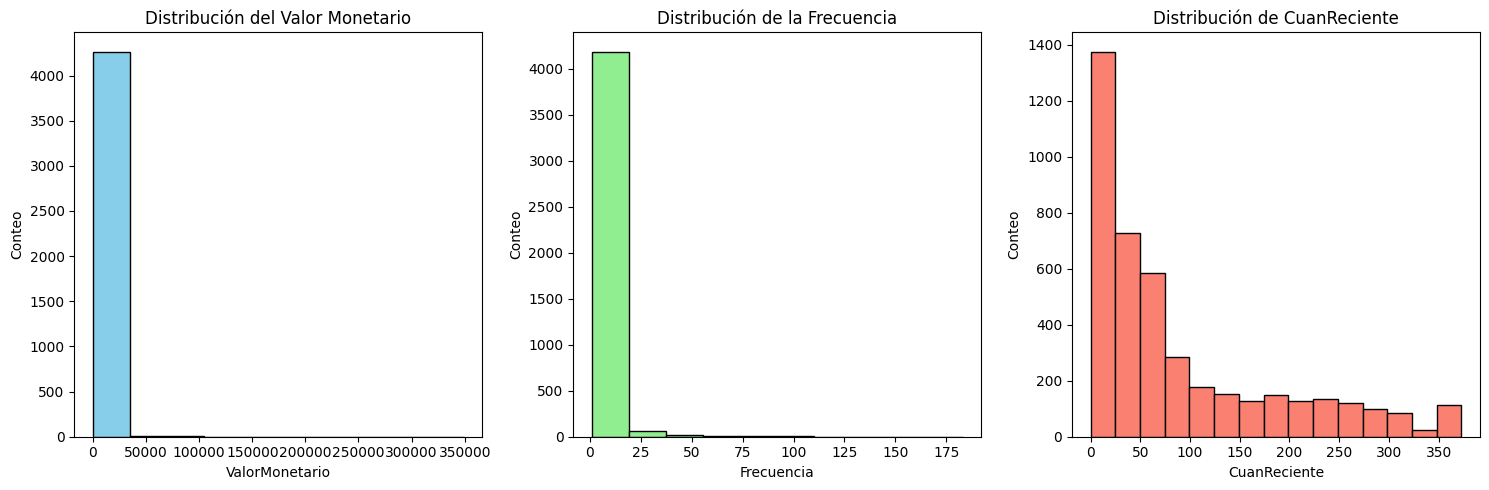

In [26]:
#Se usa un histograma para ver si hay outliers porque estos pueden afectar el rendimiento del modelo
pyplot.figure(figsize=(15,5))

pyplot.subplot(1,3,1)
pyplot.hist(agregado_df["ValorMonetario"], bins=10, color="skyblue", edgecolor="black")
pyplot.title("Distribución del Valor Monetario")
pyplot.xlabel("ValorMonetario")
pyplot.ylabel("Conteo")

pyplot.subplot(1,3,2)
pyplot.hist(agregado_df["Frecuencia"], bins=10, color="lightgreen", edgecolor="black")
pyplot.title("Distribución de la Frecuencia")
pyplot.xlabel("Frecuencia")
pyplot.ylabel("Conteo")

pyplot.subplot(1,3,3)
pyplot.hist(agregado_df["CuanReciente"], bins=15, color="salmon", edgecolor="black")
pyplot.title("Distribución de CuanReciente")
pyplot.xlabel("CuanReciente")
pyplot.ylabel("Conteo")

pyplot.tight_layout()
pyplot.show()

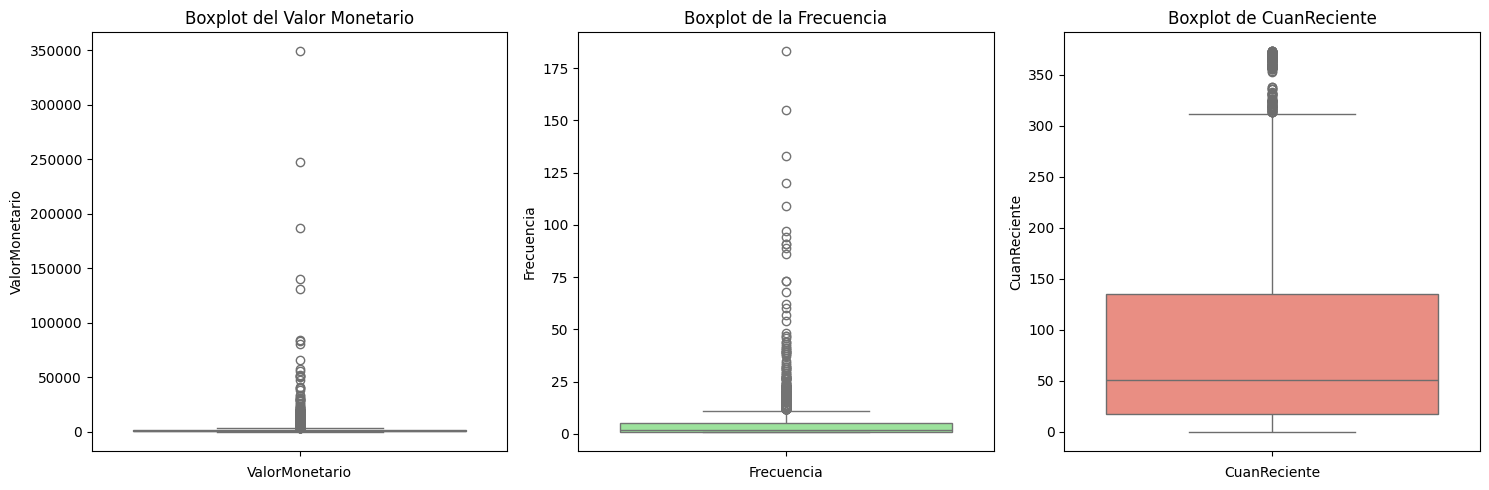

In [27]:
#ahora usaremos una boxplot con seaborn para dar mayor detalle y detectar mejor los outliers
#esta gráfica nos resalta en su mayoría los datos que se suceden entre 25% y el 75%
#pero en este caso no podemos remover los outliers ya que son los clientes más valiosos osea los que compran más
#lo mejor que se puede hacer es separar los outliers para un análisis aparte, para una categorización aparte.
pyplot.figure(figsize=(15,5))

pyplot.subplot(1,3,1)
seaborn.boxplot(agregado_df["ValorMonetario"], color="skyblue")
pyplot.title("Boxplot del Valor Monetario")
pyplot.xlabel("ValorMonetario")

pyplot.subplot(1,3,2)
seaborn.boxplot(agregado_df["Frecuencia"], color="lightgreen")
pyplot.title("Boxplot de la Frecuencia")
pyplot.xlabel("Frecuencia")

pyplot.subplot(1,3,3)
seaborn.boxplot(agregado_df["CuanReciente"], color="salmon")
pyplot.title("Boxplot de CuanReciente")
pyplot.xlabel("CuanReciente")

pyplot.tight_layout()
pyplot.show()

In [28]:
#Hay separar los outliers del Valor Monetario entonces, se usa el interquartile range method
VM_Q1 = agregado_df["ValorMonetario"].quantile(0.25)
VM_Q3 = agregado_df["ValorMonetario"].quantile(0.75)
VM_IQR = VM_Q3 - VM_Q1

outliers_monetarios_df = agregado_df[(agregado_df["ValorMonetario"] > (VM_Q3 + 1.5 * VM_IQR)) | (agregado_df["ValorMonetario"] < (VM_Q1 - 1.5 * VM_IQR))].copy()
outliers_monetarios_df.describe()


,Customer ID,ValorMonetario,Frecuencia,UltimaFechaFactura,CuanReciente
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [29]:
#Hay separar los outliers de la Frecuencia entonces, se usa el interquartile range method
F_Q1 = agregado_df["Frecuencia"].quantile(0.25)
F_Q3 = agregado_df["Frecuencia"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

outliers_frecuencia_df = agregado_df[(agregado_df["Frecuencia"] > (F_Q3 + 1.5 * F_IQR)) | (agregado_df["Frecuencia"] < (F_Q1 - 1.5 * F_IQR))].copy()
outliers_frecuencia_df.describe()

,Customer ID,ValorMonetario,Frecuencia,UltimaFechaFactura,CuanReciente
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [30]:
#crear un nuevo dataframe para los valores que no son outliers
no_outliers_df= agregado_df[(~agregado_df.index.isin(outliers_monetarios_df.index)) & (~agregado_df.index.isin(outliers_frecuencia_df.index))]#filter statement
no_outliers_df.describe()

,Customer ID,ValorMonetario,Frecuencia,UltimaFechaFactura,CuanReciente
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


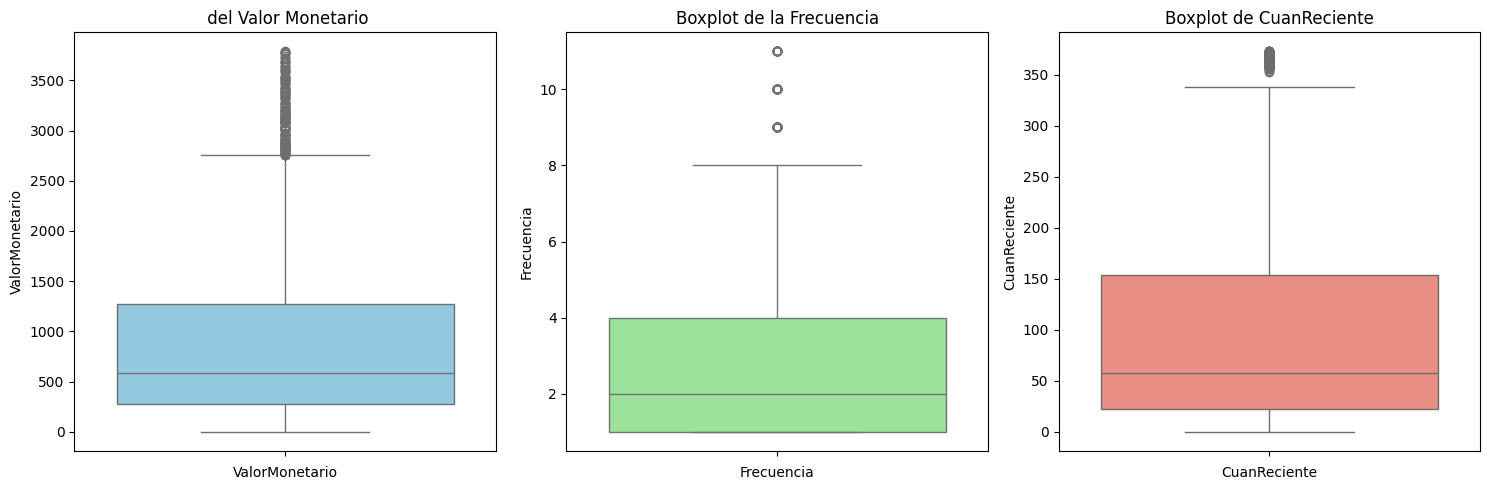

In [31]:
#Ahora se hace el boxplot pero el dataframe nuevo sin los outliers
pyplot.figure(figsize=(15,5))

pyplot.subplot(1,3,1)
seaborn.boxplot(data=no_outliers_df["ValorMonetario"], color="skyblue")
pyplot.title(" del Valor Monetario")
pyplot.xlabel("ValorMonetario")

pyplot.subplot(1,3,2)
seaborn.boxplot(data=no_outliers_df["Frecuencia"], color="lightgreen")
pyplot.title("Boxplot de la Frecuencia")
pyplot.xlabel("Frecuencia")

pyplot.subplot(1,3,3)
seaborn.boxplot(data=no_outliers_df["CuanReciente"], color="salmon")
pyplot.title("Boxplot de CuanReciente")
pyplot.xlabel("CuanReciente")

pyplot.tight_layout()
pyplot.show()

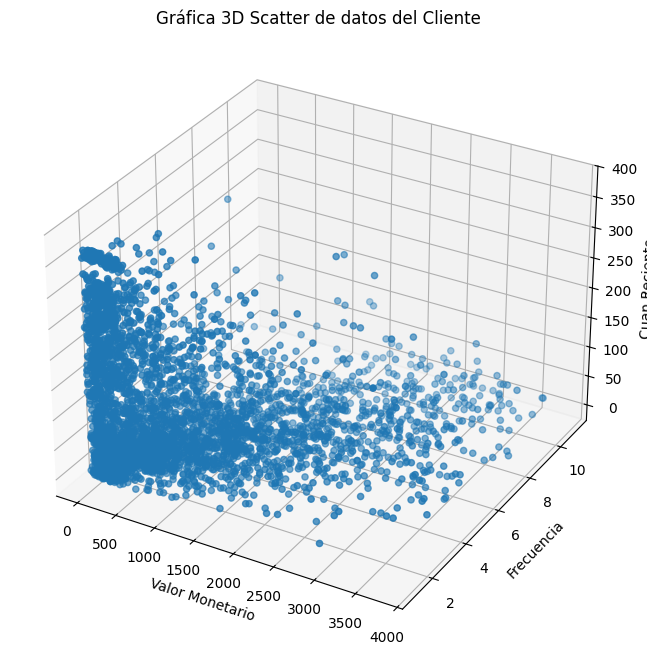

In [32]:
#Crear una gráfica de los datos en 3D basado en los 3 datos que he ido manejando
fig = pyplot.figure(figsize=(8,8))
ax=fig.add_subplot(projection="3d")
scatter = ax.scatter(no_outliers_df["ValorMonetario"], no_outliers_df["Frecuencia"], no_outliers_df["CuanReciente"])
ax.set_xlabel("Valor Monetario")
ax.set_ylabel("Frecuencia")
ax.set_zlabel("Cuan Reciente")
ax.set_title("Gráfica 3D Scatter de datos del Cliente")
pyplot.show()

De la gráfica anterior se puede concluir que hay diferentes escalas y el método kmeans es sensible a estas cosas, por lo que se tiene que tratar está problemática

In [33]:
#Se hace el proceso de scaling usando el método más común que es el Standarization con scikitlearn
scaler = StandardScaler()
data_escalada_df = scaler.fit_transform(no_outliers_df[["ValorMonetario", "Frecuencia", "CuanReciente"]])
data_escalada_df

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]], shape=(3809, 3))

In [34]:
#Convertir de vuelta el array en un dataframe
data_escalada_df = pandas.DataFrame(data_escalada_df, index=no_outliers_df.index, columns=("ValorMonetario", "Frecuencia", "CuanReciente"))
data_escalada_df

,ValorMonetario,Frecuencia,CuanReciente
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


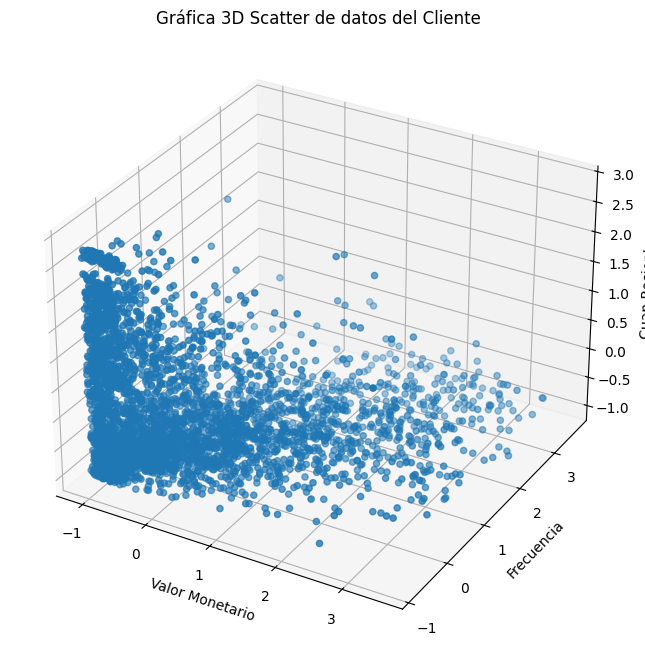

In [35]:
#volver hacer la gráfica 3d para revisar como queda la info ahora que se hizo el escalado
fig = pyplot.figure(figsize=(8,8))
ax=fig.add_subplot(projection="3d")
scatter = ax.scatter(data_escalada_df["ValorMonetario"], data_escalada_df["Frecuencia"], data_escalada_df["CuanReciente"])
ax.set_xlabel("Valor Monetario")
ax.set_ylabel("Frecuencia")
ax.set_zlabel("Cuan Reciente")
ax.set_title("Gráfica 3D Scatter de datos del Cliente")
pyplot.show()

# KMeans Clustering

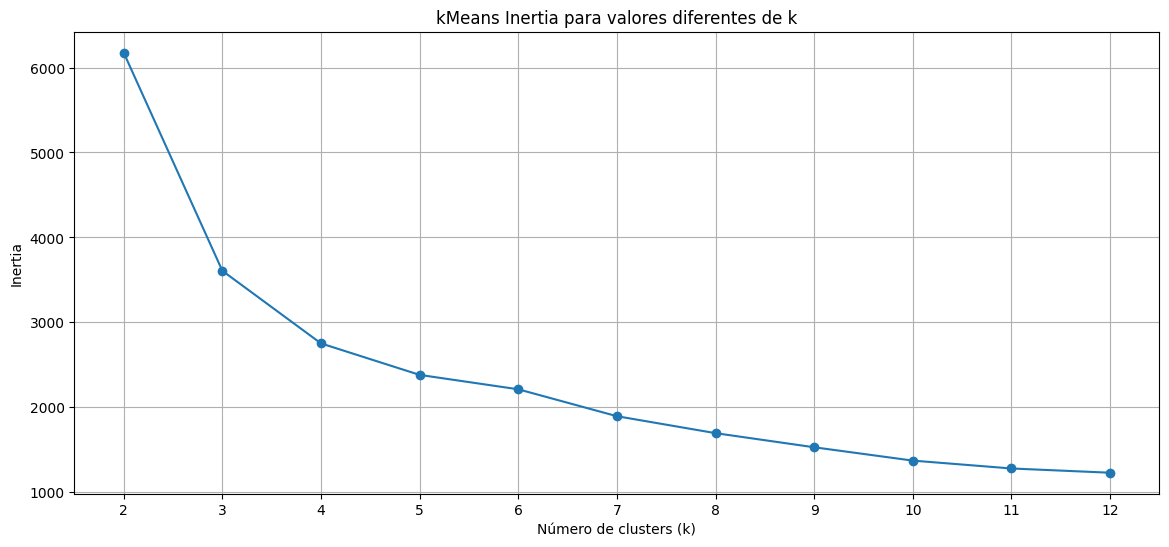

In [36]:
#Primero determinar cuantos centroids van a ser apropiados para nuestros datos
max_k= 12 #upper limit sobre cuantos cluster queremos probar
inertia = []
k_valores = range(2, max_k+1)
for k in k_valores:
    kmeans= KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit_predict(data_escalada_df)
    inertia.append(kmeans.inertia_)

pyplot.figure(figsize=(14,6))
pyplot.plot(k_valores, inertia, marker='o')
pyplot.title('kMeans Inertia para valores diferentes de k')
pyplot.xlabel('Número de clusters (k)')
pyplot.ylabel('Inertia')
pyplot.xticks(k_valores)
pyplot.grid(True)

pyplot.show()

Para dicernir se usa el método del codo, que es básicamente buscar donde está el codo en la gráfica a partir del cual ya no se optine mucho progreso, que en este caso sería entre el 4 y el 5, pero para descidir se usara otro método que es el de la siguiente sección

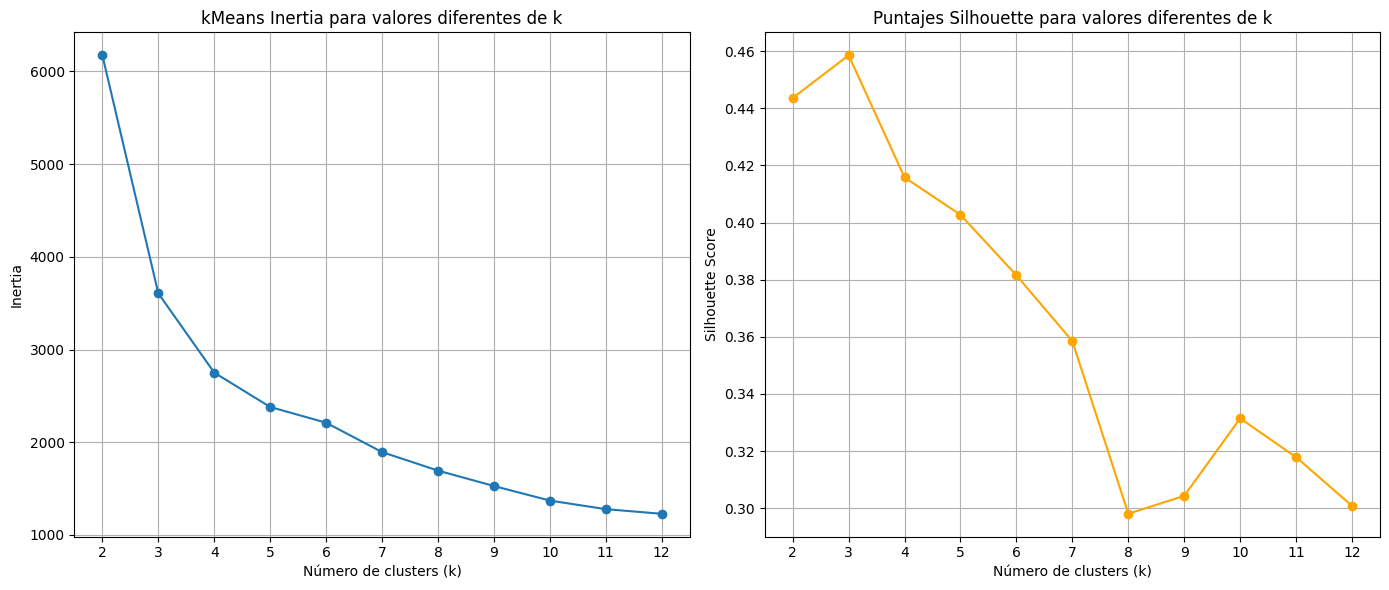

In [37]:
#SE usara el Silhouette Score para tomar la descición, un puntaje alto es bueno (como un 1 perfecto) y un puntaje 
# bajo (como un punttaje negativo) significa que hay overlapping entre los clusters
max_k= 12 #upper limit sobre cuantos cluster queremos probar
inertia = []
silhouette_scores = []
k_valores = range(2, max_k+1)
for k in k_valores:
    kmeans= KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(data_escalada_df)
    sil_score = silhouette_score(data_escalada_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

pyplot.figure(figsize=(14,6))
pyplot.subplot(1,2,1)
pyplot.plot(k_valores, inertia, marker='o')
pyplot.title('kMeans Inertia para valores diferentes de k')
pyplot.xlabel('Número de clusters (k)')
pyplot.ylabel('Inertia')
pyplot.xticks(k_valores)
pyplot.grid(True)

pyplot.subplot(1,2,2)
pyplot.plot(k_valores, silhouette_scores, marker='o', color='orange')
pyplot.title('Puntajes Silhouette para valores diferentes de k')
pyplot.xlabel('Número de clusters (k)')
pyplot.ylabel('Silhouette Score')
pyplot.xticks(k_valores)
pyplot.grid(True)

pyplot.tight_layout()
pyplot.show()

Con lo anterior se saca la conclusión que 4 clusters tiene mayor potencial que 5 de producir overlapping entre clusters, además que esto puede ser mejor porque reduce la complejidad de los análisis futuros

In [38]:
#Crear entonces nuestro modelo final
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(data_escalada_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0], shape=(3809,), dtype=int32)

In [39]:
#ahora se añaden estos 4 clusters a los datos originales
no_outliers_df["Cluster"] = cluster_labels
no_outliers_df

C:\Users\tono_\AppData\Local\Temp\ipykernel_6028\3383013881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_df["Cluster"] = cluster_labels


,Customer ID,ValorMonetario,Frecuencia,UltimaFechaFactura,CuanReciente,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


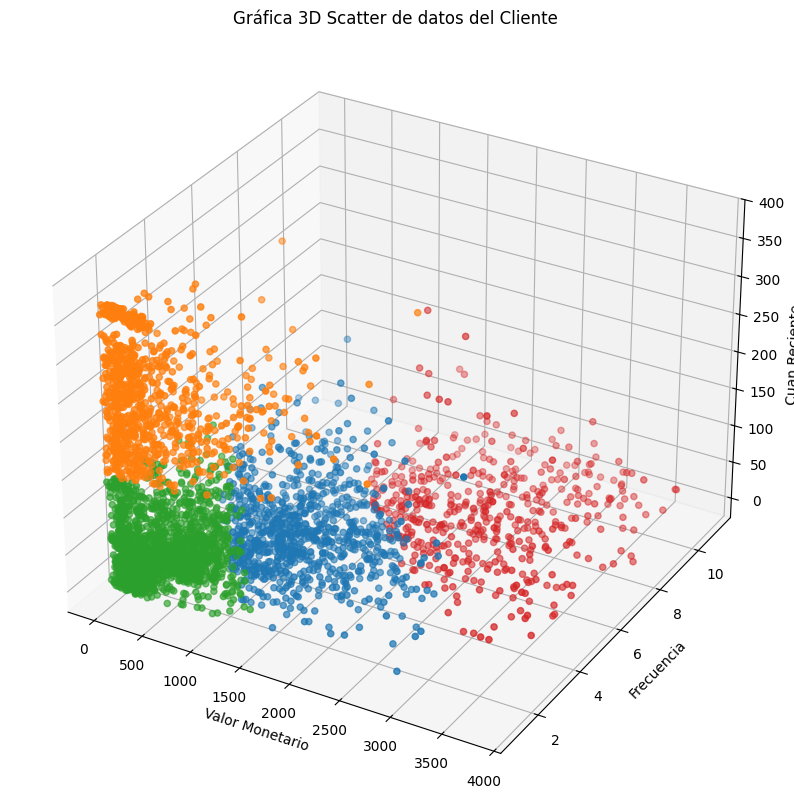

In [40]:
#Volver hacer la gráfica 3D pero con colores para que se puedan distinguir los clusters
cluster_colors={0: '#1f77b4', #Azul
                1: '#ff7f0e', #Orange
                2: '#2ca02c', #Verde
                3: '#d62728'} #Rojo
colores = no_outliers_df['Cluster'].map(cluster_colors)

fig = pyplot.figure(figsize=(10,10))
ax=fig.add_subplot(projection="3d")
scatter = ax.scatter(no_outliers_df["ValorMonetario"], 
                    no_outliers_df["Frecuencia"], 
                    no_outliers_df["CuanReciente"],
                    c=colores, #Usa colores solidos de mapa
                    marker='o')
ax.set_xlabel("Valor Monetario")
ax.set_ylabel("Frecuencia")
ax.set_zlabel("Cuan Reciente")
ax.set_title("Gráfica 3D Scatter de datos del Cliente")
pyplot.show()

# Análisis de los clusters

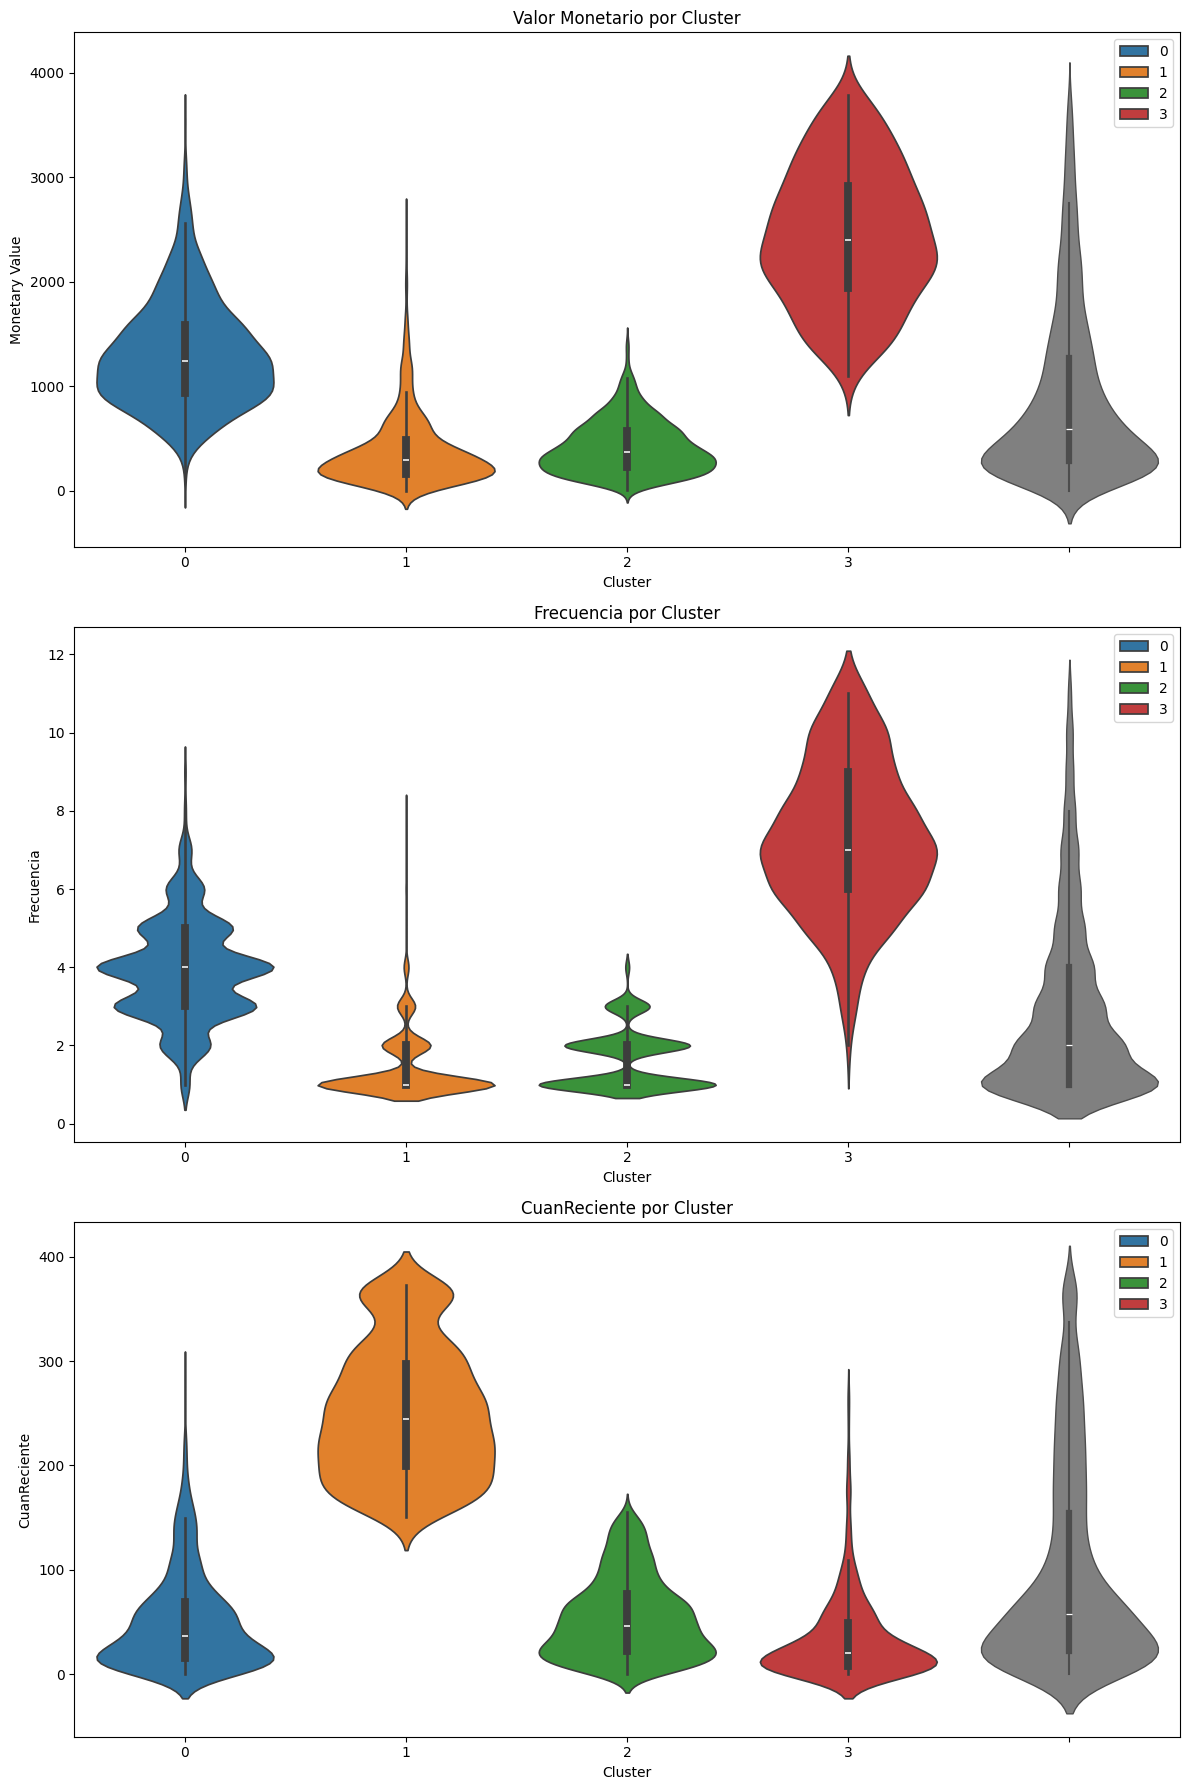

In [41]:
#Se usara Violinplot para poder hacer el análisis más aprofundidad
pyplot.figure(figsize=(12, 18))

pyplot.subplot(3, 1, 1)
seaborn.violinplot(x=no_outliers_df['Cluster'], y=no_outliers_df['ValorMonetario'], palette=cluster_colors, hue=no_outliers_df["Cluster"])
seaborn.violinplot(y=no_outliers_df['ValorMonetario'], color='gray', linewidth=1.0)
pyplot.title('Valor Monetario por Cluster')
pyplot.ylabel('Monetary Value')

pyplot.subplot(3, 1, 2)
seaborn.violinplot(x=no_outliers_df['Cluster'], y=no_outliers_df['Frecuencia'], palette=cluster_colors, hue=no_outliers_df["Cluster"])
seaborn.violinplot(y=no_outliers_df['Frecuencia'], color='gray', linewidth=1.0)
pyplot.title('Frecuencia por Cluster')
pyplot.ylabel('Frecuencia')


pyplot.subplot(3, 1, 3)
seaborn.violinplot(x=no_outliers_df['Cluster'], y=no_outliers_df['CuanReciente'], palette=cluster_colors, hue=no_outliers_df["Cluster"])
seaborn.violinplot(y=no_outliers_df['CuanReciente'], color='gray', linewidth=1.0)
pyplot.title('CuanReciente por Cluster')
pyplot.ylabel('CuanReciente')

pyplot.tight_layout()
pyplot.show()

In [42]:
#Ahora hay que incluir a los outliers que sacamos y tratar el overlapping entre ellos 
#creando como una especie de clusters manuales
overlap_indices = outliers_monetarios_df.index.intersection(outliers_frecuencia_df.index)
monetario_only_outliers = outliers_monetarios_df.drop(overlap_indices)
frecuencia_only_outliers = outliers_frecuencia_df.drop(overlap_indices)
monetario_y_frecuencia_outliers = outliers_monetarios_df.loc[overlap_indices]

monetario_only_outliers["Cluster"] = -1
frecuencia_only_outliers["Cluster"] = -2
monetario_y_frecuencia_outliers["Cluster"] = -3 

outlier_clusters_df = pandas.concat([monetario_only_outliers, frecuencia_only_outliers, monetario_y_frecuencia_outliers])
outlier_clusters_df

,Customer ID,ValorMonetario,Frecuencia,UltimaFechaFactura,CuanReciente,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


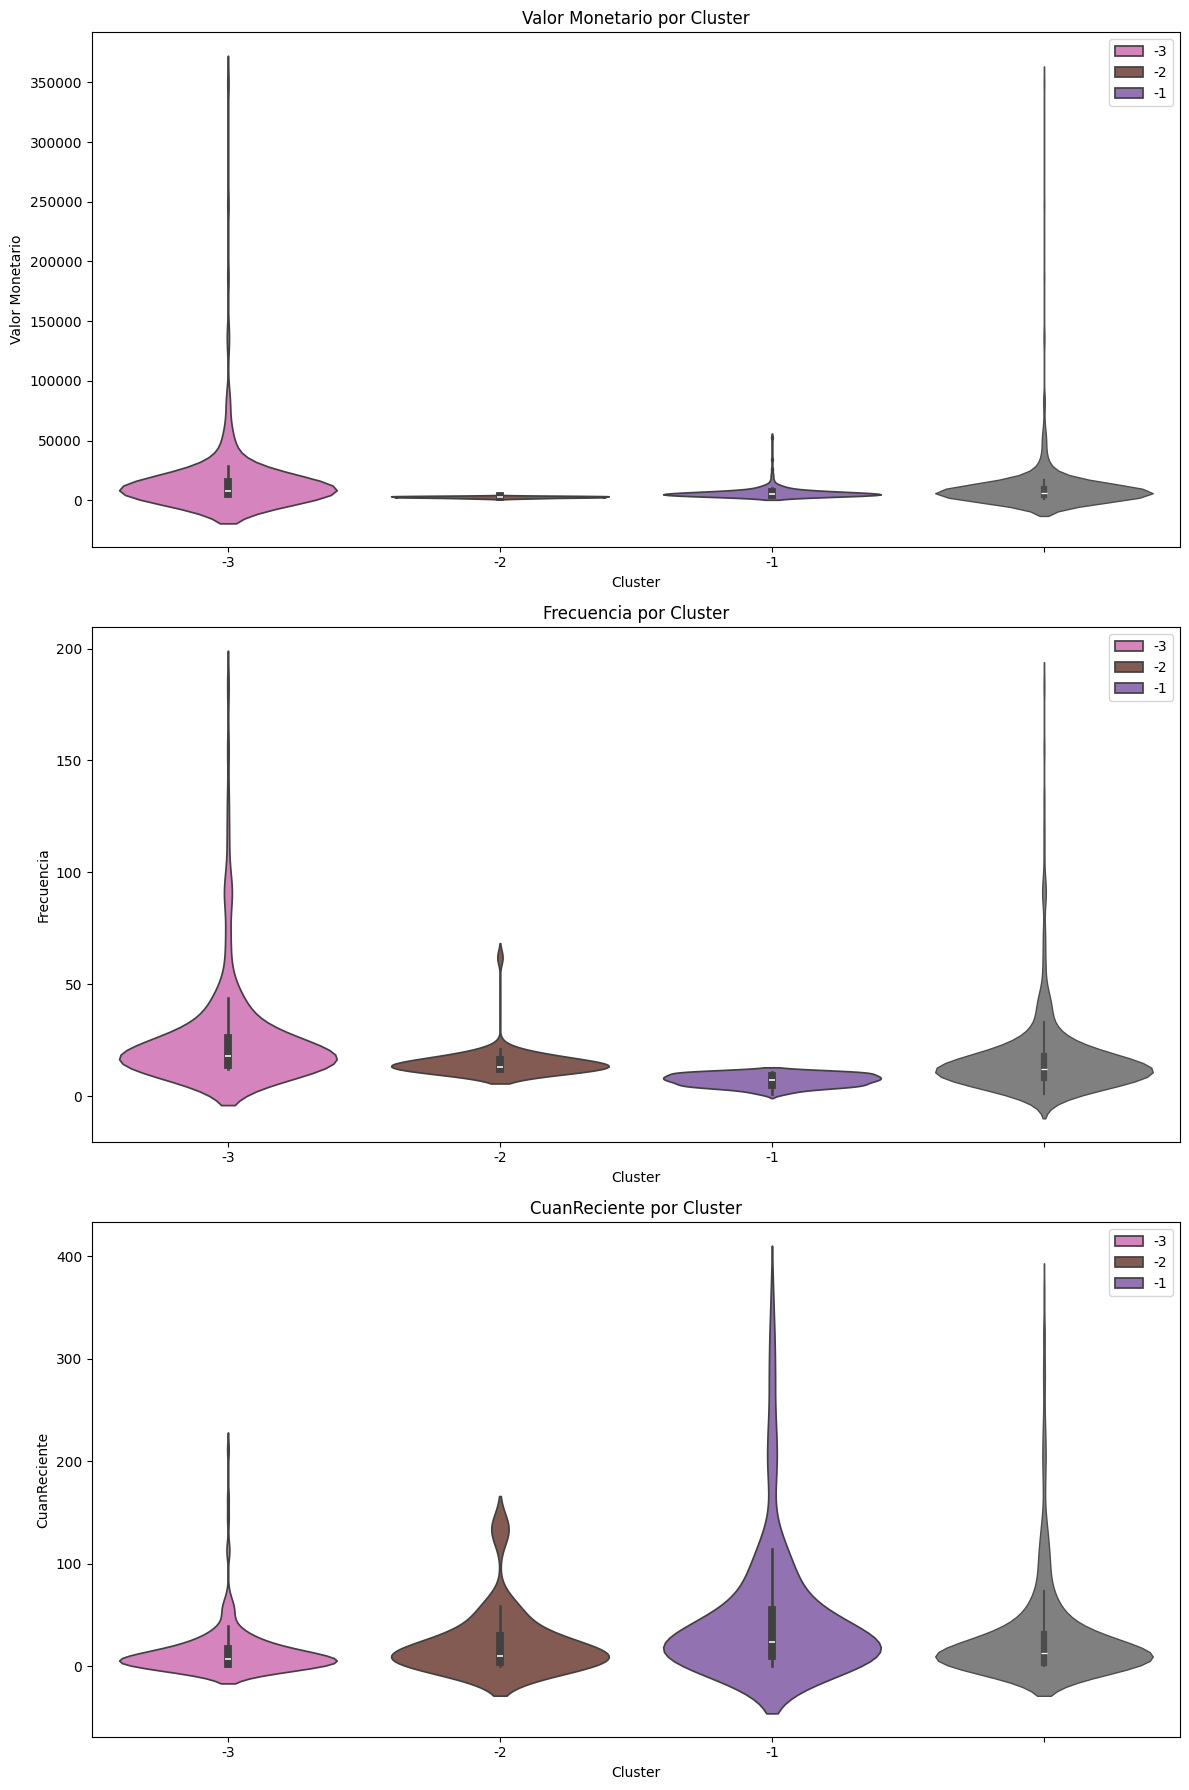

In [43]:
cluster_colors={-1: '#9467bd', 
                -2: '#8c564b', 
                -3: '#e377c2'} 

pyplot.figure(figsize=(12,18))

pyplot.subplot(3, 1, 1)
seaborn.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['ValorMonetario'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
seaborn.violinplot(y=outlier_clusters_df['ValorMonetario'], color='gray', linewidth=1.0)
pyplot.title('Valor Monetario por Cluster')
pyplot.ylabel('Valor Monetario')

pyplot.subplot(3, 1, 2)
seaborn.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frecuencia'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
seaborn.violinplot(y=outlier_clusters_df['Frecuencia'], color='gray', linewidth=1.0)
pyplot.title('Frecuencia por Cluster')
pyplot.ylabel('Frecuencia')


pyplot.subplot(3, 1, 3)
seaborn.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['CuanReciente'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
seaborn.violinplot(y=outlier_clusters_df['CuanReciente'], color='gray', linewidth=1.0)
pyplot.title('CuanReciente por Cluster')
pyplot.ylabel('CuanReciente')

pyplot.tight_layout()
pyplot.show()

In [50]:
#Agregar etiquetas a cada cluster
cluster_labels = {
    0: "RETENER",
    1: "RE-ENGAGE",
    2: "NUTRIR",
    3: "RECOMPENSAR",
    -1: "MIMAR",
    -2: "UPSELL",
    -3: "DELEITAR"
}

In [51]:
#Juntar los 2 dataframes con los clusters de outliers y los que no
full_clustering_df = pandas.concat([no_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,ValorMonetario,Frecuencia,UltimaFechaFactura,CuanReciente,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [52]:
#Agregar al dataframe completo la columna "ClusterLabel"
full_clustering_df["ClusterEtiqueta"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,ValorMonetario,Frecuencia,UltimaFechaFactura,CuanReciente,Cluster,ClusterEtiqueta
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETENER
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,NUTRIR
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETENER
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NUTRIR
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELEITAR
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELEITAR
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELEITAR
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELEITAR


# Visualización

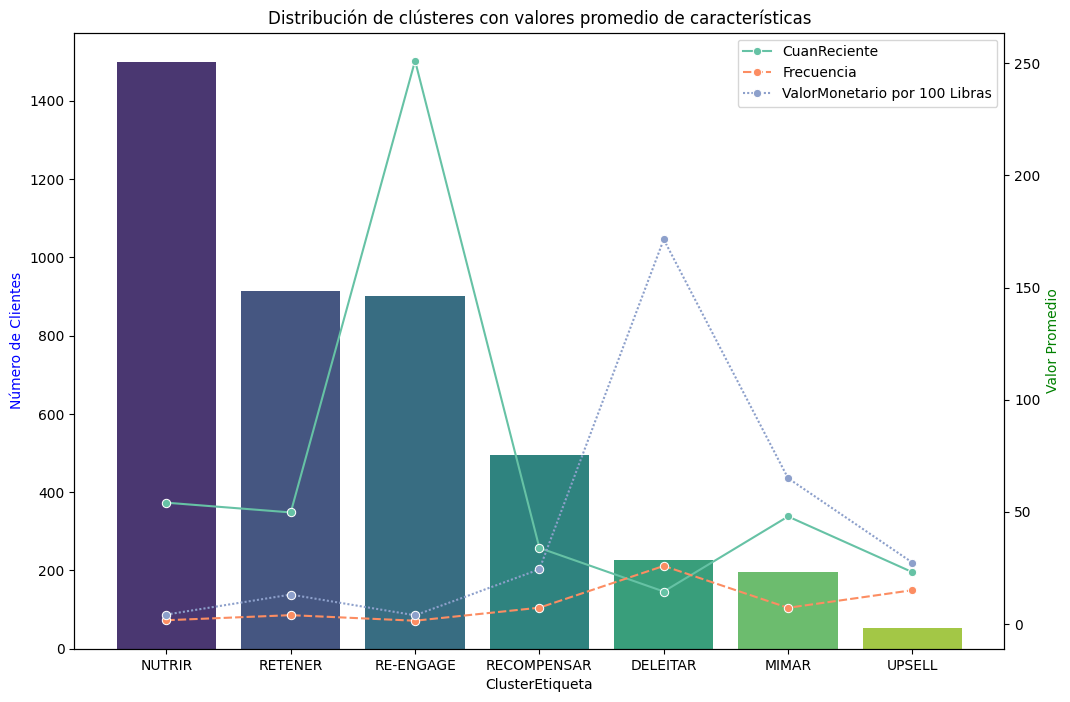

In [ ]:
#Creo una gráfica donde pongo todos mis descubrimientos, específicamente son una gráfica de barras y una líneal
cluster_counts = full_clustering_df['ClusterEtiqueta'].value_counts()
full_clustering_df["ValorMonetario por 100 Libras"] = full_clustering_df["ValorMonetario"] / 100.00
feature_means = full_clustering_df.groupby('ClusterEtiqueta')[['CuanReciente', 'Frecuencia', 'ValorMonetario por 100 Libras']].mean()

fig, ax1 = pyplot.subplots(figsize=(12, 8))

seaborn.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Número de Clientes', color='b')
ax1.set_title('Distribución de grupos con valores promedio de características')

ax2 = ax1.twinx()

seaborn.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Valor Promedio', color='g')

pyplot.show()

# CONCLUSIÓNES
-. Cluster 1 "Nutrir": 
* Razón: Este grupo representa al mayor número de clientes, aquellos menos activos y de menor valor monetario, pero que han realizado compras recientemente. Estos clientes pueden ser nuevos o necesitar atención para aumentar su compromiso y gasto.
* Acción: Céntrate en establecer relaciones, proporcionar un excelente servicio al cliente y ofrecer incentivos para fomentar compras más frecuentes.

-. Cluster 2 "Retener": 
* Razón: Este grupo representa a clientes de alto valor que compran con regularidad, aunque no siempre de forma reciente. El enfoque debe centrarse en los esfuerzos de retención para mantener su lealtad y sus niveles de gasto.
* Acción: Implementa programas de fidelización, ofertas personalizadas y una interacción regular para garantizar que sigan activos.

-. Cluster 3 "Re-Engage": 
* Razón: Este grupo incluye compradores poco frecuentes y de menor valor que no han comprado recientemente. El objetivo debe ser volver a captar su interés para que vuelvan a comprar activamente.
* Acción: Utiliza campañas de marketing dirigidas, descuentos especiales o recordatorios para animarlos a volver y comprar de nuevo.

-. Cluster 4 "Recompensar": 
* Razón: Este grupo incluye compradores de alto valor y muy frecuentes, muchos de los cuales siguen comprando activamente. Son tus clientes más fieles, y recompensar su lealtad es clave para mantener su compromiso.
* Acción: Implementa un programa de fidelización sólido, ofrece ofertas exclusivas y reconoce su lealtad para mantenerlos comprometidos y satisfechos.

-. Cluster 5 "DELEITAR" (Outliers Monetarios & Frecuencia): 
* Características: Los clientes más valiosos, con un gasto extremo y compras frecuentes. Probablemente sean tus clientes más importantes, que requieren una atención especial. 
* Estrategia potencial: Desarrolla programas VIP u ofertas exclusivas para mantener su lealtad y fomentar su compromiso continuo.

-. Cluster 6 "MIMAR" (Outliers Monetarios): 
* Características: Gastan mucho, pero no compran con frecuencia. Sus compras son grandes, pero poco frecuentesl.
* Estrategia potencial: Centrarse en mantener su fidelidad con ofertas personalizadas o servicios de lujo que se adapten a su alta capacidad de gasto.

-. Cluster 7 "UPSELL" (Outliers Frecuencia): 
* Características: Compradores frecuentes que gastan menos por compra. Estos clientes están constantemente comprometidos, pero podrían beneficiarse de oportunidades de venta adicional. 
* Estrategia potencial: Implementar programas de fidelización u ofertas combinadas para fomentar un mayor gasto por visita, dada su frecuente participación.
